In [ ]:
#reference https://anderfernandez.com/en/blog/kmeans-algorithm-python/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#input data
data = pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#ambil yang numerik, nama negara tidak diambil
data_values = data.iloc[:, 1:]
data_values

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data_values = data.iloc[:, 1:]
data_c = data_values.columns

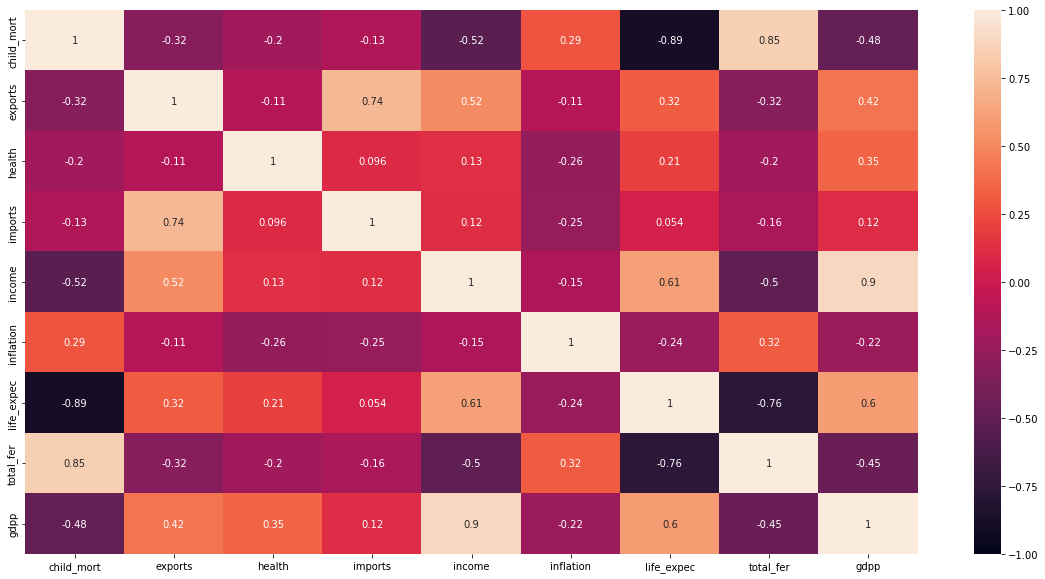

In [ ]:
#heatmap correlation
plt.figure(figsize=(20, 10))
sns.heatmap(data_values.corr(), vmin = -1, vmax = 1, annot = True)

In [ ]:
#Korelasi paling tinggi:
# income-gdpp - 0.9
# child_mort-total_fer - 0.85
# imports-exports - 0.74

**SCATTER PLOT**

Text(0, 0.5, 'child_mort')

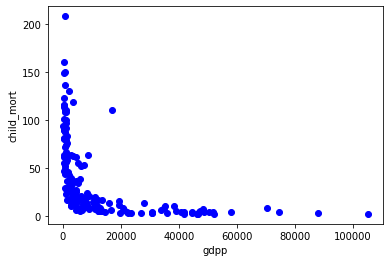

In [ ]:
plt.scatter(data_values["gdpp"], data_values["child_mort"], c='b')
plt.xlabel("gdpp")
plt.ylabel("child_mort")

Text(0, 0.5, 'total_fer')

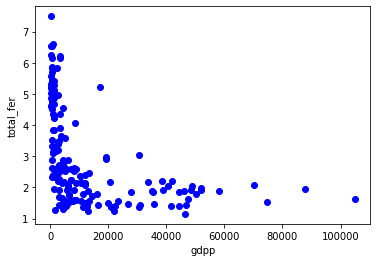

In [ ]:
plt.scatter(data_values["gdpp"], data_values["total_fer"], c='b')
plt.xlabel("gdpp")
plt.ylabel("total_fer")

Text(0, 0.5, 'child_mort')

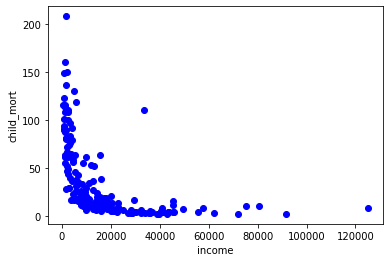

In [ ]:
plt.scatter(data_values["income"], data_values["child_mort"], c='b')
plt.xlabel("income")
plt.ylabel("child_mort")

Text(0, 0.5, 'total_fer')

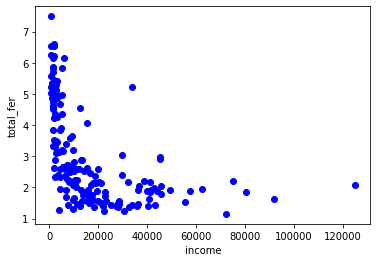

In [ ]:
plt.scatter(data_values["income"], data_values["total_fer"], c='b')
plt.xlabel("income")
plt.ylabel("total_fer")


In [ ]:
#data buat di clusterisasi
data_c = data_values[["gdpp", "child_mort"]]
data_c

,gdpp,child_mort
0,553,90.2
1,4090,16.6
2,4460,27.3
3,3530,119.0
4,12200,10.3
...,...,...
162,2970,29.2
163,13500,17.1
164,1310,23.3
165,1310,56.3


In [ ]:
#inisialisasi centroid dengan random
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

In [ ]:
#cari distance centroid dan cluster
def calculate_dist(a,b):
    dist = np.square(np.sum((a-b)**2))

    return dist

In [ ]:
#assign centroid ke cluster
def assign_centroid(data, centroids):

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_dist(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)


In [ ]:
#main function
def kmeans(data, k):

    # init centroid sama distance
    centroids = initialize_centroids(k, data)
    distance = []
    isEqual = True
    i = 0

    while(isEqual):
        # cari centroid sama distance
        data['centroid'], it_distance = assign_centroid(data,centroids)
        distance = np.append(distance, sum(it_distance))
        # group ke data, calculate mean
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        #cek jika centroids < k, jika ya, reinit ulang
        if(centroids.shape[0] < k):
            num_of_centroid = k - centroids.shape[0] 
            reinit_centroid = initialize_centroids(num_of_centroid, data.drop(['centroid'], axis = 1))

            # cari index yang centroidnya ngada
            missing = np.isin(np.array(range(k)), centroids.index)
            reinit_centroid.index = np.array(range(k))[missing == False]

            # include centroid yang baru
            centroids = centroids.append(reinit_centroid)

        # cek jika distance berkurang sama sama dengan sebelumnya
        if(len(distance)<2):
            isEqual = True
        else:
            if(round(distance[i],3) !=  round(distance[i-1],3)):
                isEqual = True
            else:
                isEqual = False
        i = i + 1 

    
    return (data['centroid'], distance[-1], centroids)

In [ ]:
#scaling
data_l = data_c
data_l = (data_l - np.min(data_l)) / (np.max(data_l) - np.min(data_l))
data_c = (data_c - np.min(data_c)) / (np.max(data_c) - np.min(data_c))
data_l

,gdpp,child_mort
0,0.003073,0.426485
1,0.036833,0.068160
2,0.040365,0.120253
3,0.031488,0.566699
4,0.114242,0.037488
...,...,...
162,0.026143,0.129503
163,0.126650,0.070594
164,0.010299,0.100779
165,0.010299,0.261441


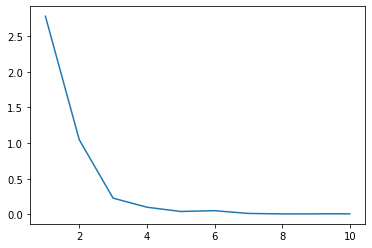

In [ ]:
total_e = []
    
for i in range(10):
  _,error,_ = kmeans(data_l, i+1)
  total_e.append(error)

plt.plot(range(1,11), total_e)

In [ ]:
data_c['centroid'], _, centroids =  kmeans(data_c,3)
data_c

,gdpp,child_mort,centroid
0,0.003073,0.426485,0
1,0.036833,0.068160,1
2,0.040365,0.120253,1
3,0.031488,0.566699,0
4,0.114242,0.037488,1
...,...,...,...
162,0.026143,0.129503,1
163,0.126650,0.070594,1
164,0.010299,0.100779,1
165,0.010299,0.261441,1


Text(0, 0.5, 'Child Mortality')

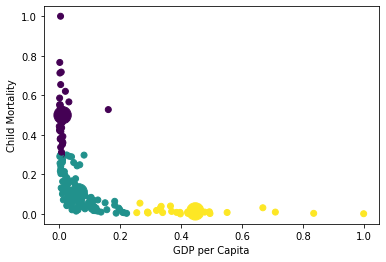

In [ ]:
plt.scatter(data_c.iloc[:,0], data_c.iloc[:,1], c = data_c['centroid'])
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, c = centroids.index)

plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality")

In [ ]:
cluster_name = ["cluster 0", "cluster 1", "cluster 2"]
color = ["purple", "green", "yellow"]
clss = ["Low GDPP-High Child Mortality", "Low GDPP-Low Child Mortality", "High GDPP-Low Low Child Mortality"]

best_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'classification': clss})
best_summary

,Color,Name,classification
0,purple,cluster 0,Low GDPP-High Child Mortality
1,green,cluster 1,Low GDPP-Low Child Mortality
2,yellow,cluster 2,High GDPP-Low Low Child Mortality
